#OPTIMASI AKURASI LIMA MODEL MACHINE LEARNING DENGAN MENGGUNAKAN SMOTE UNTUK DETEKSI PENIPUAN KARTU KREDIT


#1. Perkenalan Dataset

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


#2. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

#3. Memuat Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning 2/Tugas Kelompok/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

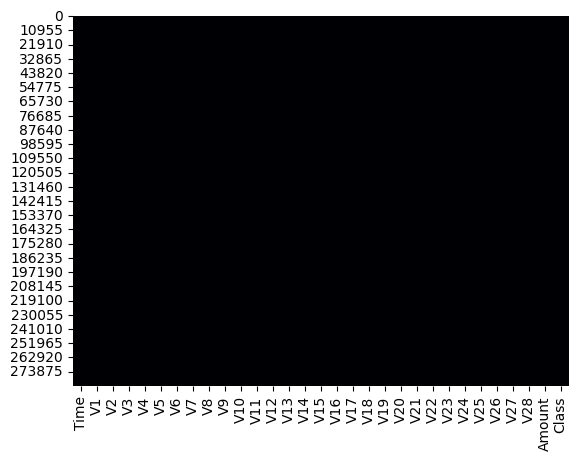

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

- **No null values** present in the data!

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


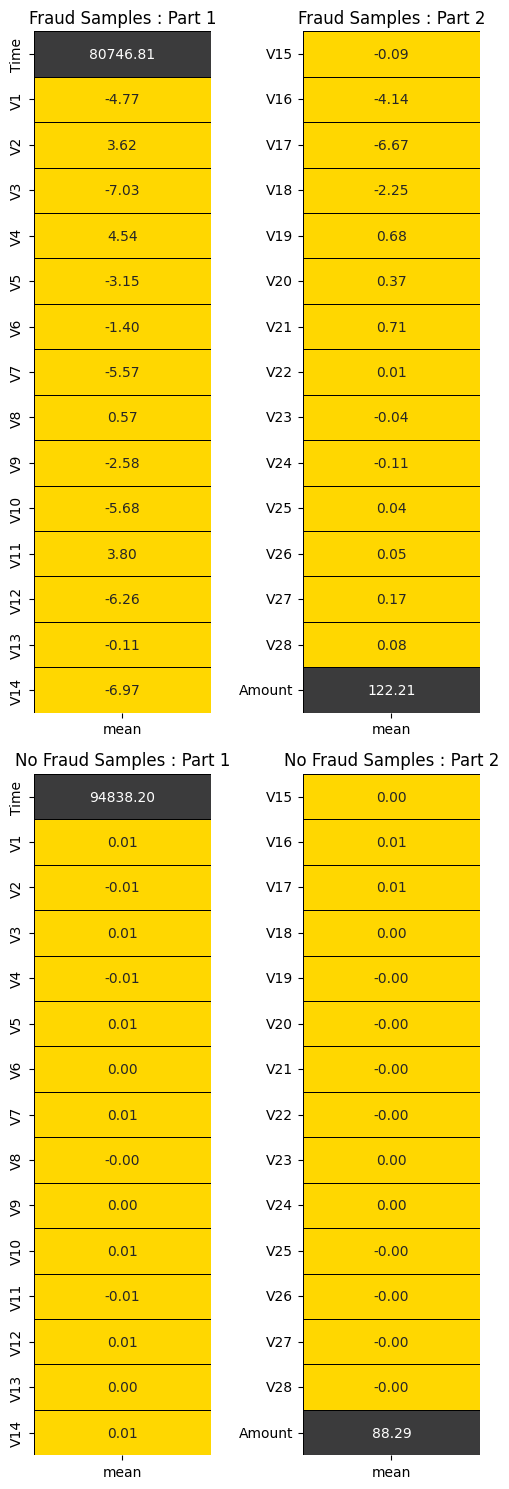

In [ ]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)


#4. Visualisasi data

visualisasi tabel target(class)

<ipython-input-200-871784436>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data = data,edgecolor = 'black',palette = colors)
<ipython-input-200-871784436>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Fraud','Fraud'])


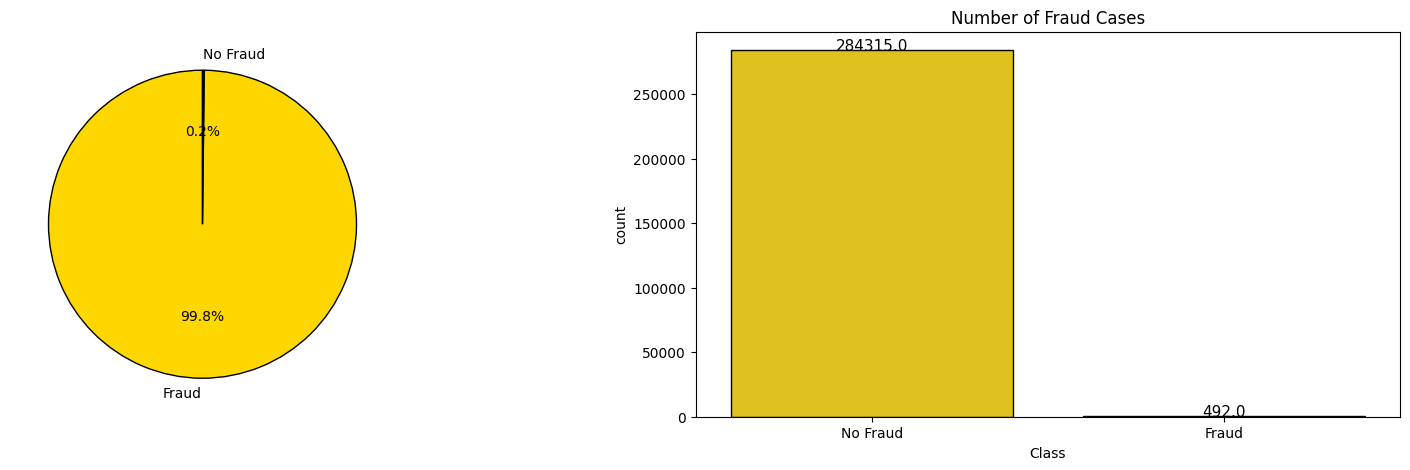

In [ ]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
# Pass the column name 'Class' to the 'x' parameter
ax = sns.countplot(x='Class', data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

#5. Seleksi Fiture

Correlation Matrix :


<Axes: >

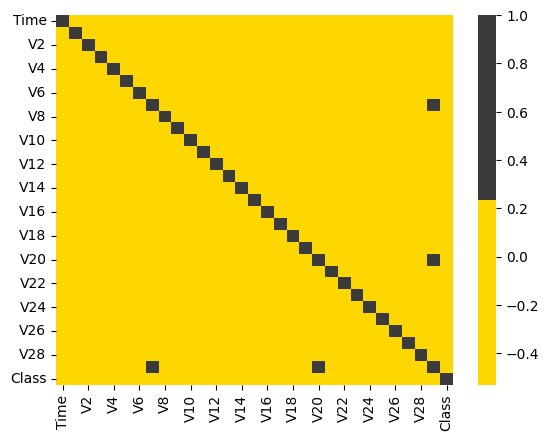

In [ ]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

- Ada terlalu banyak fitur dalam dataset dan sulit untuk memahami apa pun

- Oleh karena itu, kita akan memplot peta korelasi hanya dengan variabel target

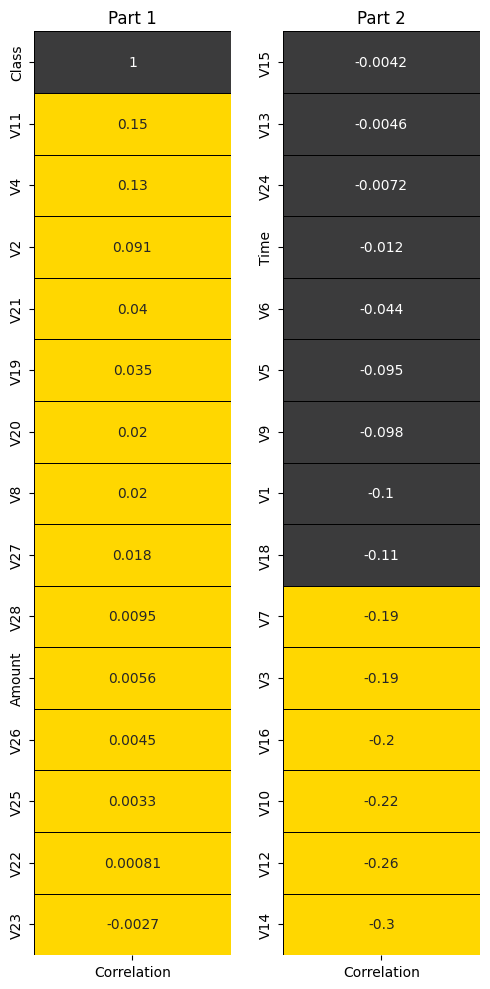

In [ ]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

- Untuk pemilihan fitur, kami akan mengecualikan fitur yang memiliki nilai korelasi antara [-0.1.0.1]

- V4, V11 berkorelasi positif dan V7, V3, V16, V10, V12, V14, V17 berkorelasi negatif dengan fitur Kelas.

ANOVA Test :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

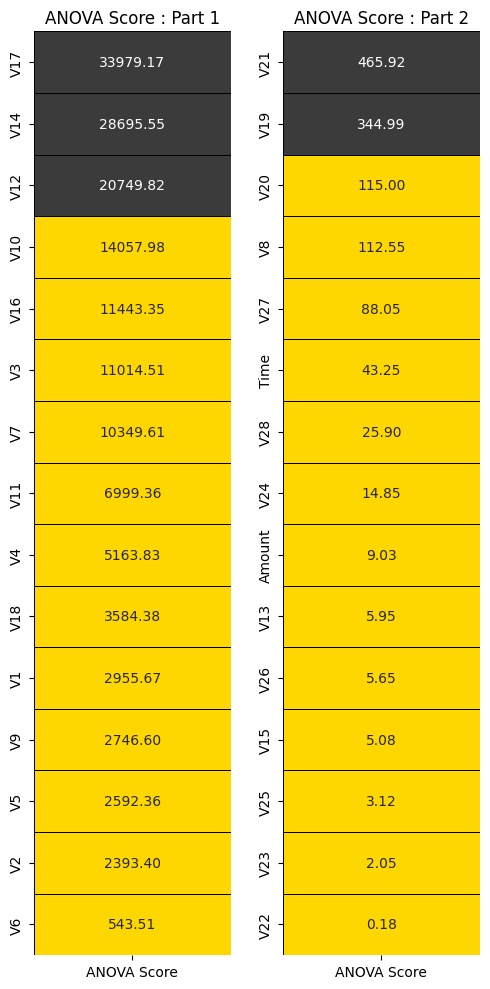

In [ ]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Semakin tinggi nilai skor ANOVA, semakin tinggi pula pentingnya fitur tersebut dengan variabel target.

- Dari plot di atas, kami akan menolak fitur dengan nilai kurang dari 50

- dalam kasus ini kita akan membuat 2 model berdasarkan fitur yang dipilih dari Plot Korelasi & Skor ANOVA

Dataset untuk Model berdasarkan Plot Korelasi

In [ ]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


Dataset untuk Model berdasarkan ANOVA Score :

In [ ]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


#6. Penyeimbangan Data

-> Untuk mengatasi data yang tidak seimbang, ada 2 pilihan

- **Undersampling** Memangkas sebagian besar sampel variabel target

- **Oversampling** Meningkatkan sampel minoritas dari variabel target ke sampel mayoritas.

-> Untuk kinerja terbaik, kami akan menggunakan kombinasi undersampling dan oversampling

-> Pertama,mengambil sampel mayoritas yang kurang dan diikuti dengan mengambil sampel minoritas yang lebih banyak.

-> Untuk penyeimbangan data, kami akan menggunakan **imblearn**

-> **pip statement** = pip install ketidakseimbangan-learn

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Penyeimbangan Data untuk Model berdasarkan Correlation Plot :

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 4920, np.int64(1): 2460})

Penyeimbangan Data untuk Model berdasarkan ANOVA Score :

In [ ]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({np.int64(0): 4920, np.int64(1): 2460})

Mengkalkulasi untuk Data Balancing

**Sampling Strategy**  sampel ini adalah rasio yang merupakan parameter umum untuk oversampling and undersampling

**Sampling Strategy** (Sample Kelas Minoritas)/(Sample Kelas Mayoritas)

Dalam hal ini,

Majority Class: No Fraud Cases 284315 samples

Minority Class: Fraud Cases 492 samples




-> **Undersampling**: Mengurangi sampel kelas mayoritas

- Sampling_strategy = 0,1
- 0,1(492)/Sampel Kelas Mayoritas
- Setelah pengambilan sampel yang terlalu rendah,
  - Kelas Mayoritas: Tidak Ada Kasus Penipuan: 4920 sampel
  - Kelas Minoritas: Kasus Penipuan 492 sampel

-> **Oversampling** Meningkatkan sampel kelas minoritas

- Sampling_strategy-05
- 05 Sampel Kelas Minoritas)/4920
- Setelah pengambilan sampel berlebihan,
  - Kelas Mayoritas: Tidak Ada Kasus Penipuan 4920 sampel
  - Kelas Minoritas: Kasus Penipuan 2400 sampel
- sampai kelas akhir

  - Majority Class : No Fraud Cases : 4920 samples
  - Minority Class : Fraud Cases : 2460 samples

- untuk kumpulan data yang tidak seimbang, kami perlu menduplikasikan data untuk menangani potensi kesalahan dalam prediksi
- Mengenai proses duplikasi ini, kami menggunakan data sintetis untuk tujuan pemodelan guna memastikan bahwa prediksi tersebut bias. Menuju nilai kelas target traporty

- Oleh karena itu, mengevaluasi model dengan menggunakan akurasi akan menyesatkan. Sebaliknya, kami akan menggunakan matriks , grafik ROC-AUC dan skor ROC-AUC atau evaluasi model

#7. Model

##a. Membangun Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay # Changed from plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

Membagi data  80 - 20 untuk train - test gabungan.

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # Use RocCurveDisplay.from_estimator to plot the ROC curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Negatif','False Positif','False Negatif','True Positif']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


##b. Evaluasi Tiap Model

###1] Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Model berdasarkan Correlation Plot :

Cross Validation Score :  98.04%
ROC_AUC Score :  93.09%


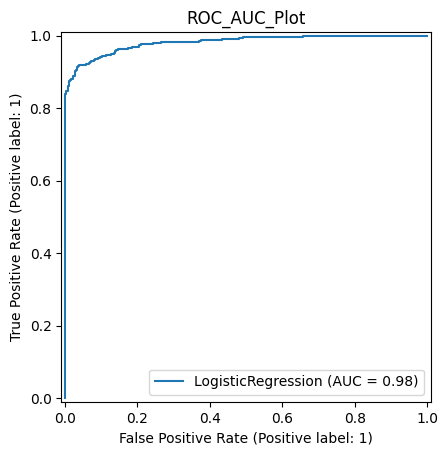

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       975
           1       0.96      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



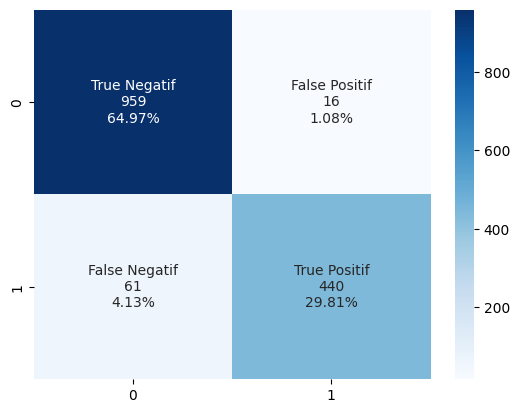

In [ ]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

Model berdasarkan ANOVA Score :

Cross Validation Score :  98.68%
ROC_AUC Score :  93.80%


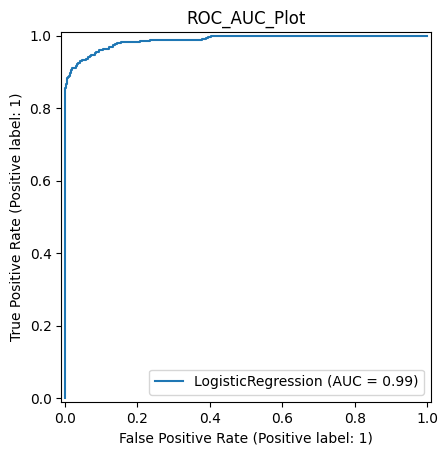

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.97      0.89      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



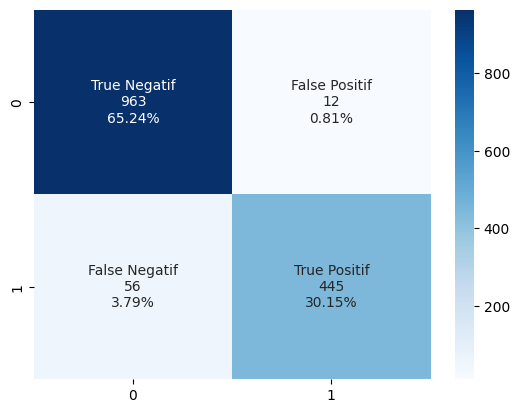

In [ ]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

###2] Support Vector Classifier :

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Model berdasarkan Correlation Plot :

Cross Validation Score :  98.04%
ROC_AUC Score :  92.85%


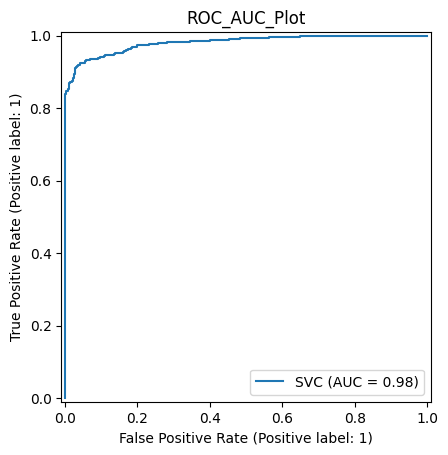

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



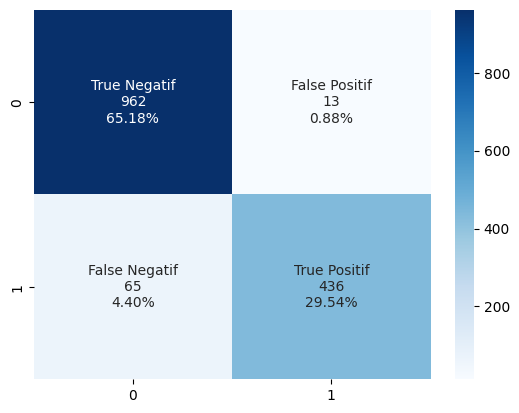

In [ ]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

Model berdasarkan ANOVA Score :

Cross Validation Score :  98.49%
ROC_AUC Score :  93.60%


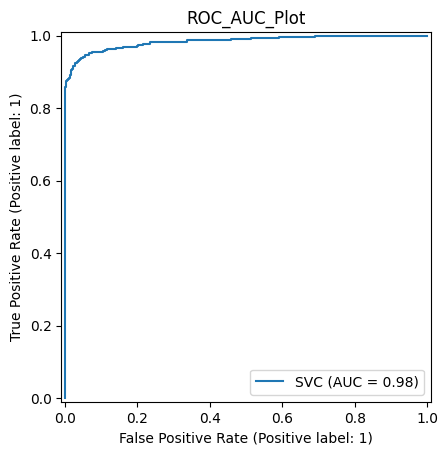

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.95      0.95      1476



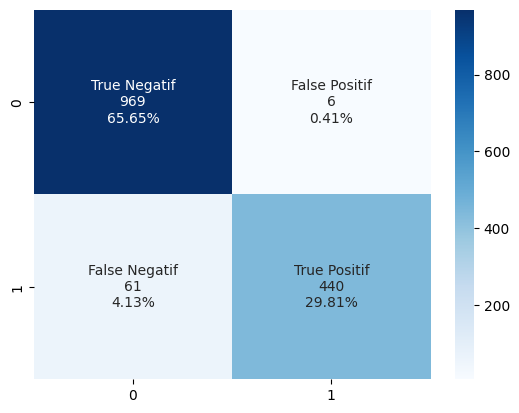

In [ ]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

###3] Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Model berdasarkan Correlation Plot :

Cross Validation Score :  96.05%
ROC_AUC Score :  93.35%


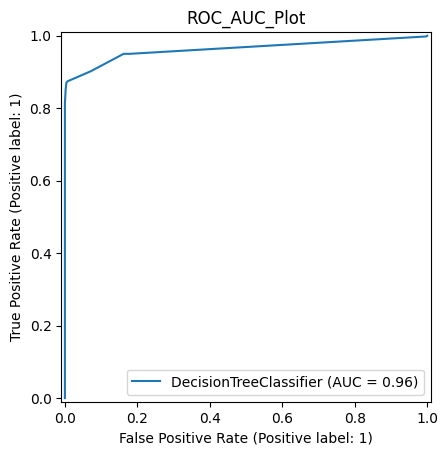

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.98      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.95      1476
weighted avg       0.95      0.95      0.95      1476



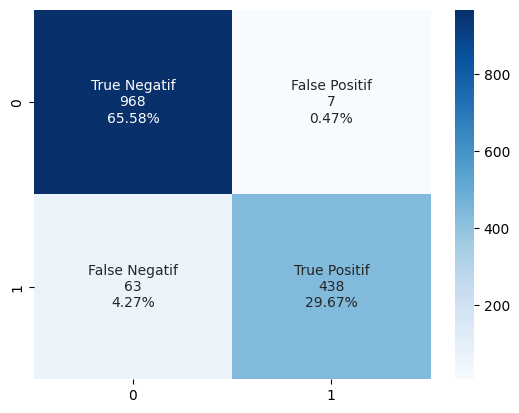

In [ ]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

Model berdasarkan ANOVA Score :

Cross Validation Score :  96.82%
ROC_AUC Score :  93.23%


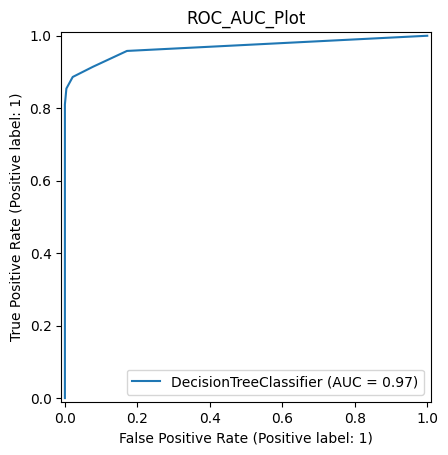

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       975
           1       0.95      0.89      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



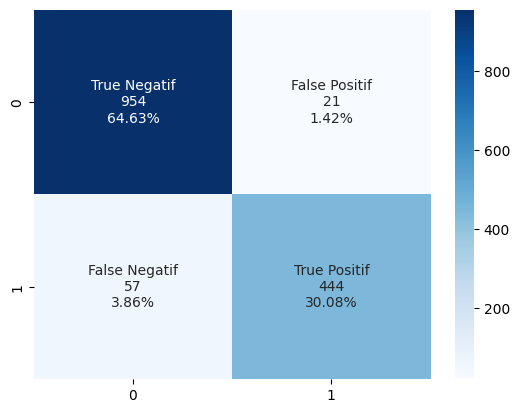

In [ ]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

###4] Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Model berdasarkan Correlation Plot :

Cross Validation Score :  97.78%
ROC_AUC Score :  93.16%


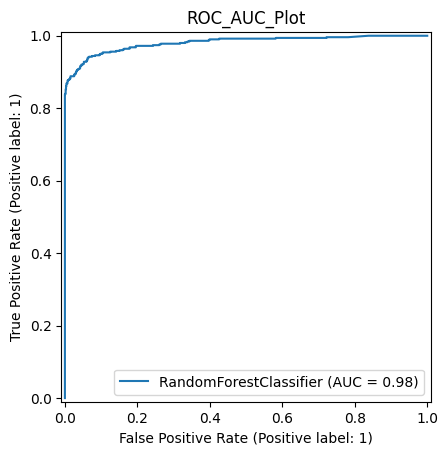

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.99      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



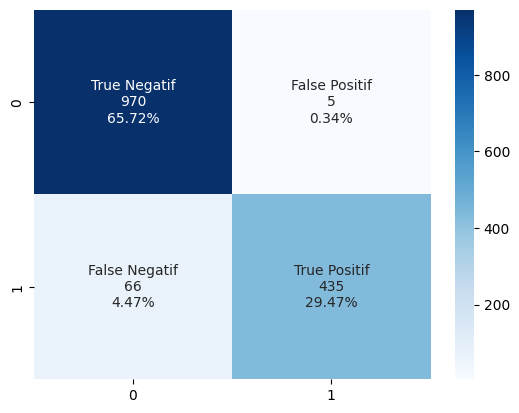

In [ ]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

Model berdasarkan ANOVA Score :

Cross Validation Score :  98.19%
ROC_AUC Score :  93.01%


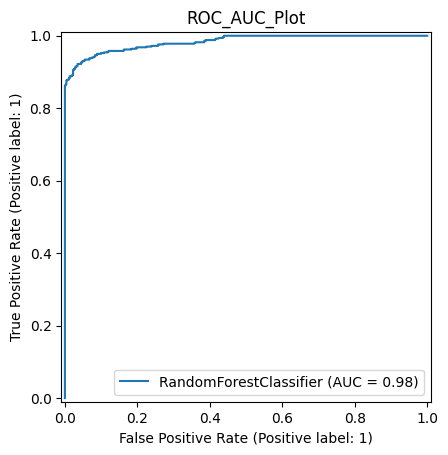

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



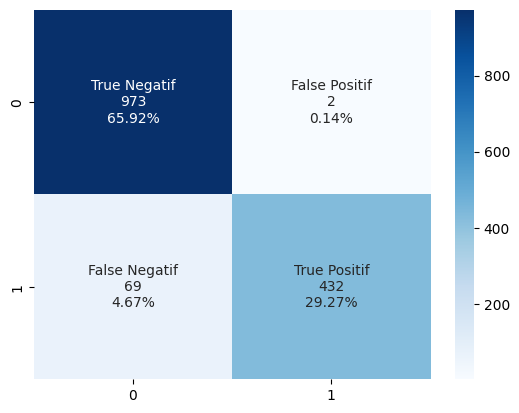

In [ ]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

###5] K-Nearest Neighbors :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Model berdasarkan Correlation Plot :

Cross Validation Score :  99.26%
ROC_AUC Score :  98.43%


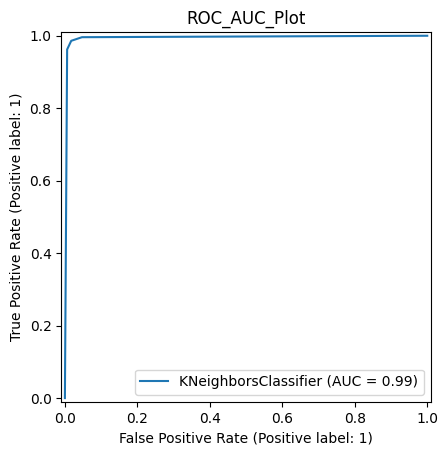

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



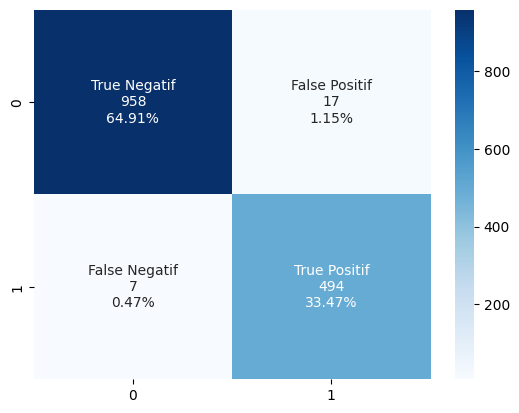

In [ ]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

Model berdasarkan ANOVA Score :

Cross Validation Score :  99.52%
ROC_AUC Score :  97.87%


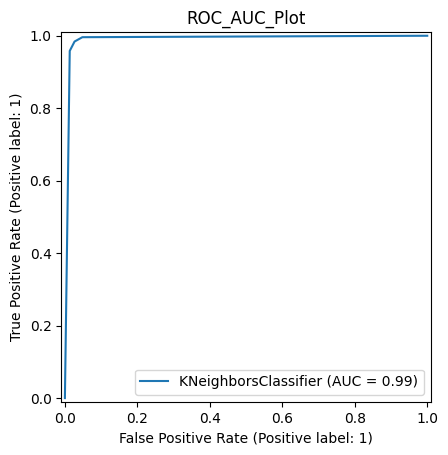

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       975
           1       0.95      0.98      0.97       501

    accuracy                           0.98      1476
   macro avg       0.97      0.98      0.97      1476
weighted avg       0.98      0.98      0.98      1476



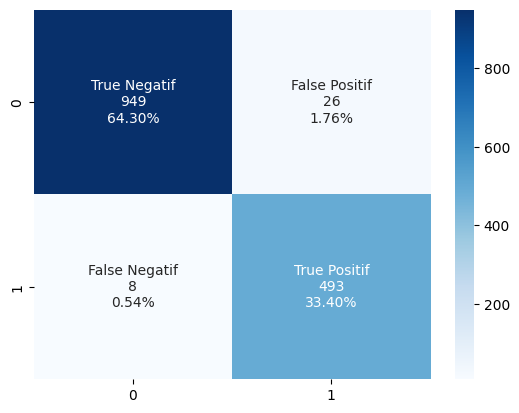

In [ ]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

##c. Tuning Model ("optimasi")

In [ ]:
models = {

    "Logistic Regression": LogisticRegression(random_state = 0),
    "Decision Tree": DecisionTreeClassifier(random_state = 1000),
    "Random Forest": RandomForestClassifier(random_state = 0),
    "SVM": SVC(),
    "classifier_knn":KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

}


# Definisikan parameter grid untuk setiap model
param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l2']},
    "Decision Tree": {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5]},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "classifier_knn": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

# Lakukan tuning untuk setiap model
tuned_models = {}
for name in models.keys():
    if name == "Logistic Regression":
         model_instance = LogisticRegression(random_state = 0)
    elif name == "Decision Tree":
         model_instance = DecisionTreeClassifier(random_state = 1000)
    elif name == "Random Forest":
         model_instance = RandomForestClassifier(random_state = 0)
    elif name == "SVM":
         model_instance = SVC()
    elif name == "classifier_knn":
         model_instance = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
    else:
        model_instance = models[name] # Use the existing model instance if not specifically handled


    grid_search = GridSearchCV(estimator=model_instance, param_grid=param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(f2, t2)
    tuned_models[name] = grid_search.best_estimator_

    print(f"Tuned Models : {name}")
    print(f"Best params : {grid_search.best_params_}")
    print(f"Best score : {grid_search.best_score_}")
    print("\n")

Tuned Models : Logistic Regression
Best params : {'C': 0.1, 'penalty': 'l2'}
Best score : 0.9600271002710027


Tuned Models : Decision Tree
Best params : {'max_depth': 10, 'min_samples_split': 2}
Best score : 0.962330623306233


Tuned Models : Random Forest
Best params : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best score : 0.9810298102981029


Tuned Models : SVM
Best params : {'C': 10, 'kernel': 'rbf'}
Best score : 0.9644986449864499


Tuned Models : classifier_knn
Best params : {'n_neighbors': 7, 'weights': 'distance'}
Best score : 0.9844173441734417




##d. Evaluasi Model  setelah Tuning


=== METRIK EVALUASI MODEL ===
                     accuracy  precision  recall   f1  roc_auc
Random Forest            1.00       1.00    1.00 1.00     1.00
classifier_knn           1.00       1.00    1.00 1.00     1.00
Decision Tree            0.99       0.99    0.98 0.99     1.00
SVM                      0.96       0.99    0.89 0.94     1.00
Logistic Regression      0.95       0.98    0.89 0.93     0.99


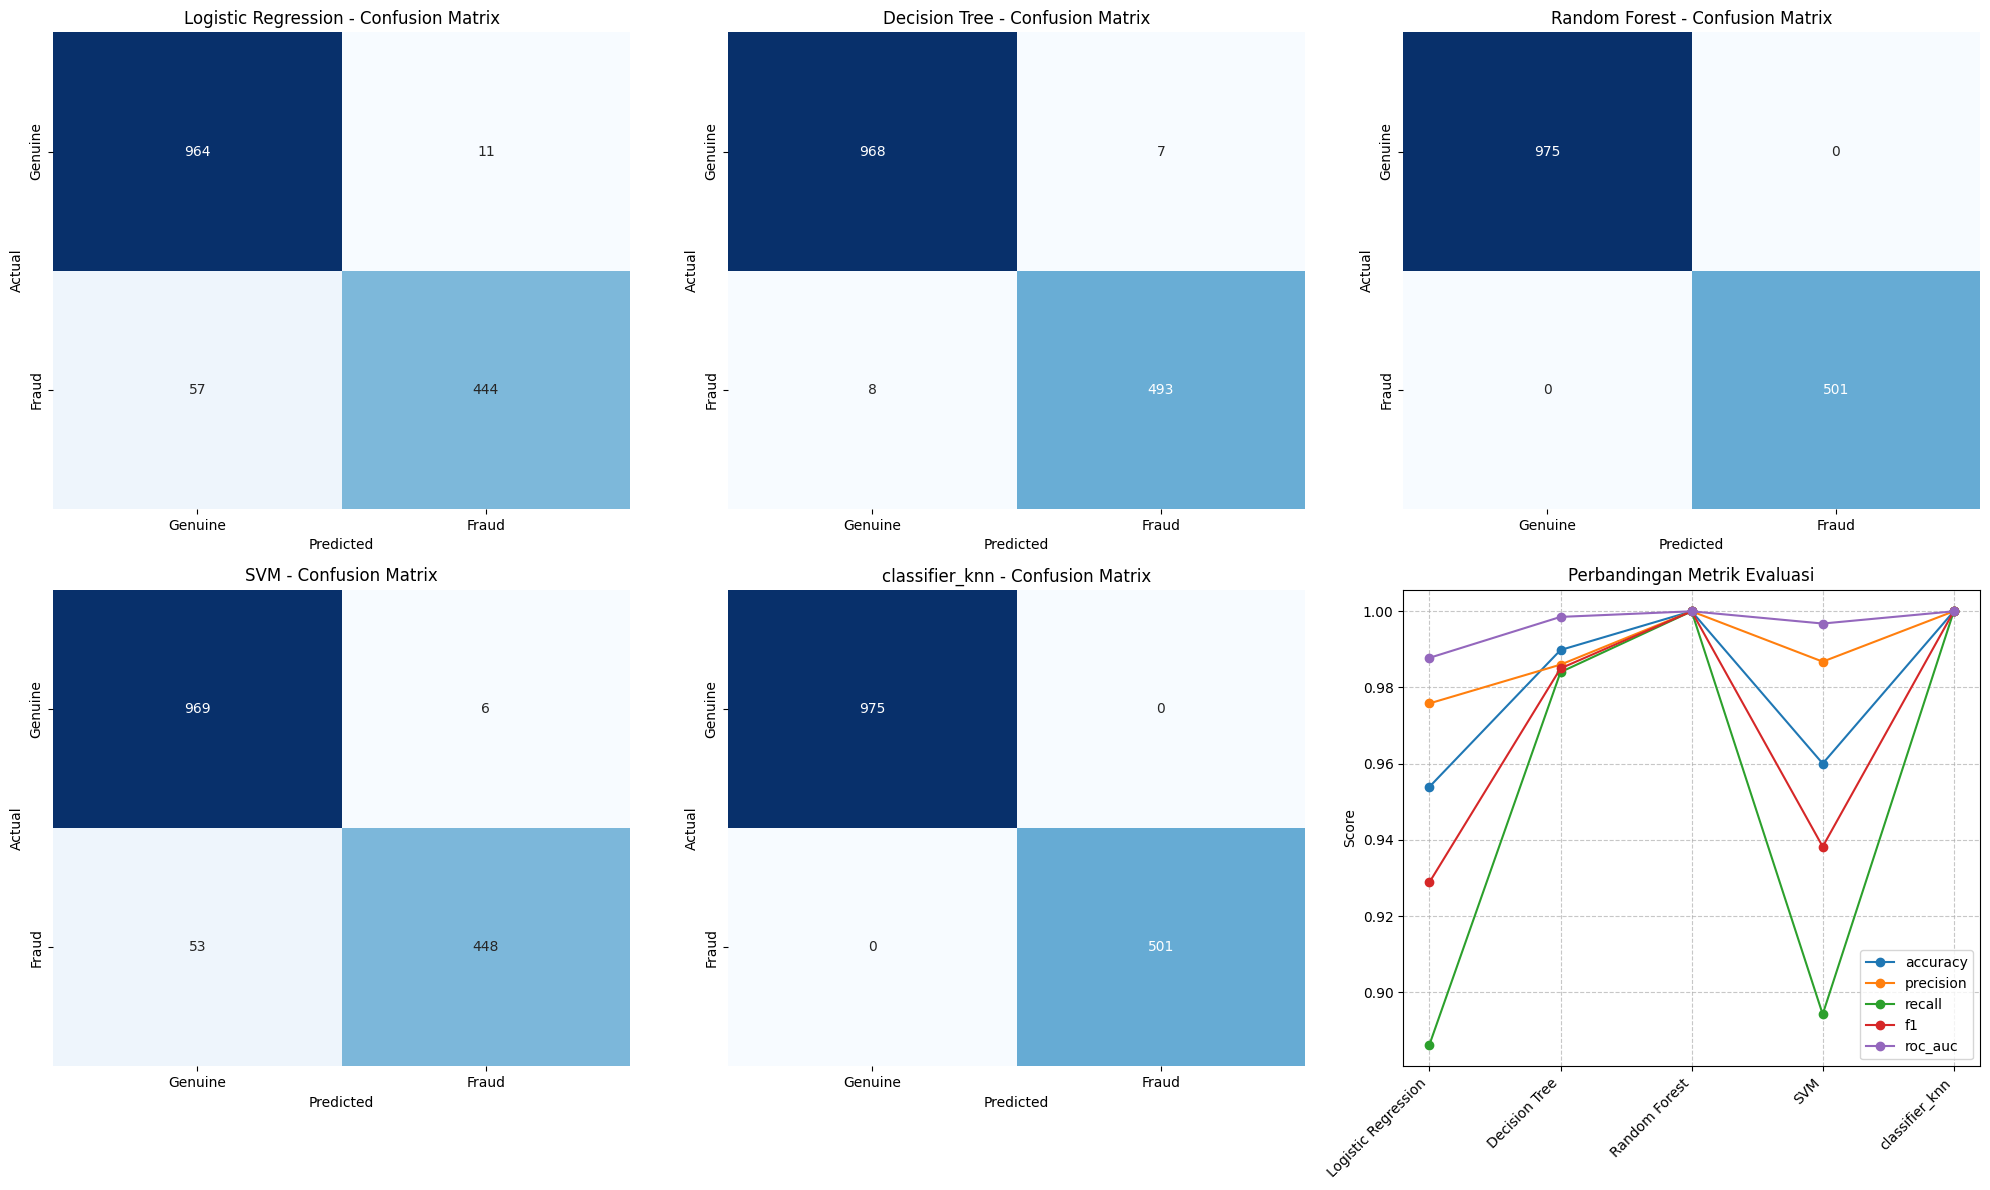


*** MODEL TERBAIK (Berdasarkan ROC-AUC): Random Forest ***
Dengan ROC-AUC: 1.0000

=== LAPORAN KLASIFIKASI MODEL TERBAIK (Random Forest) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       1.00      1.00      1.00       501

    accuracy                           1.00      1476
   macro avg       1.00      1.00      1.00      1476
weighted avg       1.00      1.00      1.00      1476



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Make sure pandas is imported

# Fungsi evaluasi teroptimasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Handle proba vs decision function for ROC
    # Use try-except block to handle models that don't have either method gracefully
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
             # Handle cases where neither method is available, perhaps skip ROC AUC or raise error
             y_proba = None # Set to None or handle as appropriate
             print(f"Warning: Model {type(model).__name__} does not have predict_proba or decision_function. Cannot compute ROC AUC.")

    except Exception as e:
         print(f"Error calculating ROC AUC for {type(model).__name__}: {e}")
         y_proba = None

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred)
    }

    if y_proba is not None:
         try:
             metrics['roc_auc'] = roc_auc_score(y_test, y_proba)
         except ValueError as e:
             print(f"Error calculating ROC AUC score for {type(model).__name__}: {e}. This might happen if the test set contains only one class after sampling.")
             metrics['roc_auc'] = np.nan # Assign NaN if ROC AUC cannot be calculated


    return metrics


# Evaluasi semua model sekaligus using the correct test set (x_test2, y_test2)
results = {name: evaluate_model(model, x_test2, y_test2) for name, model in tuned_models.items()}


# Tampilkan hasil dalam DataFrame
metrics_df = pd.DataFrame.from_dict(results, orient='index')
# Ensure 'roc_auc' column exists before selecting
metrics_cols = ['accuracy', 'precision', 'recall', 'f1']
if 'roc_auc' in metrics_df.columns:
    metrics_cols.append('roc_auc')

metrics_df = metrics_df[metrics_cols] # Select columns
print("\n=== METRIK EVALUASI MODEL ===")
# Sort by 'roc_auc' only if it exists
if 'roc_auc' in metrics_df.columns:
    print(metrics_df.sort_values('roc_auc', ascending=False))
else:
    print(metrics_df) # Print without sorting by ROC AUC


# Visualisasi terintegrasi
# Adjust the number of subplots based on the number of models
num_models = len(results)
nrows = (num_models + 2) // 3 # Calculate rows needed for confusion matrices + 1 for comparison plot
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 6))
axes = axes.flatten() # Flatten the axes array for easier iteration

# Confusion Matrix
for i, (name, res) in enumerate(results.items()):
    if 'conf_matrix' in res: # Check if confusion matrix was generated
        sns.heatmap(res['conf_matrix'], annot=True, fmt='d', cmap='Blues',
                    ax=axes[i], cbar=False,
                    xticklabels=['Genuine', 'Fraud'],
                    yticklabels=['Genuine', 'Fraud'])
        axes[i].set_title(f'{name} - Confusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    else:
        axes[i].set_visible(False) # Hide subplot if no matrix

# Find the correct axis for the metrics comparison plot
metrics_ax_index = num_models # Place it after the confusion matrices
if metrics_ax_index < len(axes):
    ax = axes[metrics_ax_index]
else:
    # If all subplots are used for confusion matrices, create a new figure/axis for metrics
    fig_metrics, ax = plt.subplots(1, 1, figsize=(10, 6))
    print("Note: Metrics comparison plot in a separate figure due to space.")


# Perbandingan metrik
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
if 'roc_auc' in metrics_df.columns:
    metrics_to_plot.append('roc_auc')

for metric in metrics_to_plot:
    if metric in metrics_df.columns:
        ax.plot(metrics_df.index, metrics_df[metric], 'o-', label=metric)
ax.set_title('Perbandingan Metrik Evaluasi')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.grid(True, linestyle='--', alpha=0.7)
# Adjust ylim based on data range, maybe not always 0.9 to 1.0
# ax.set_ylim(0.9, 1.0)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide unused subplots if any
for j in range(metrics_ax_index + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

# Identifikasi model terbaik
if 'roc_auc' in metrics_df.columns and not metrics_df['roc_auc'].isnull().all():
    best_model_name = metrics_df['roc_auc'].idxmax()
    print(f"\n*** MODEL TERBAIK (Berdasarkan ROC-AUC): {best_model_name} ***")
    print(f"Dengan ROC-AUC: {metrics_df.loc[best_model_name, 'roc_auc']:.4f}")
else:
     print("\n*** Cannot determine best model by ROC-AUC as it was not computed for all models or is all NaN. ***")


# Laporan klasifikasi untuk model terbaik
# Ensure X_test and y_test are defined for the final classification report
# Use the test set corresponding to the data used for tuning
X_test_final = x_test2
y_test_final = y_test2

if 'best_model_name' in locals() and best_model_name in tuned_models:
    print(f"\n=== LAPORAN KLASIFIKASI MODEL TERBAIK ({best_model_name}) ===")
    y_pred_best = tuned_models[best_model_name].predict(X_test_final)
    print(classification_report(y_test_final, y_pred_best))
elif 'best_model_name' not in locals():
    print("\nCannot generate classification report for the best model as it could not be identified.")
else:
    print(f"\nCannot find '{best_model_name}' in tuned_models to generate classification report.")

##e. Analisis Hasil Evaluasi Model


=== PERBANDINGAN SEBELUM DAN SESUDAH TUNING ===

Rata-rata Peningkatan Metrik Setelah Tuning:
                     Rata-rata Peningkatan (%)
Logistic Regression                       2.57
Decision Tree                             2.12
Random Forest                             2.12
SVM                                       2.04
K-Nearest Neighbors                       1.29


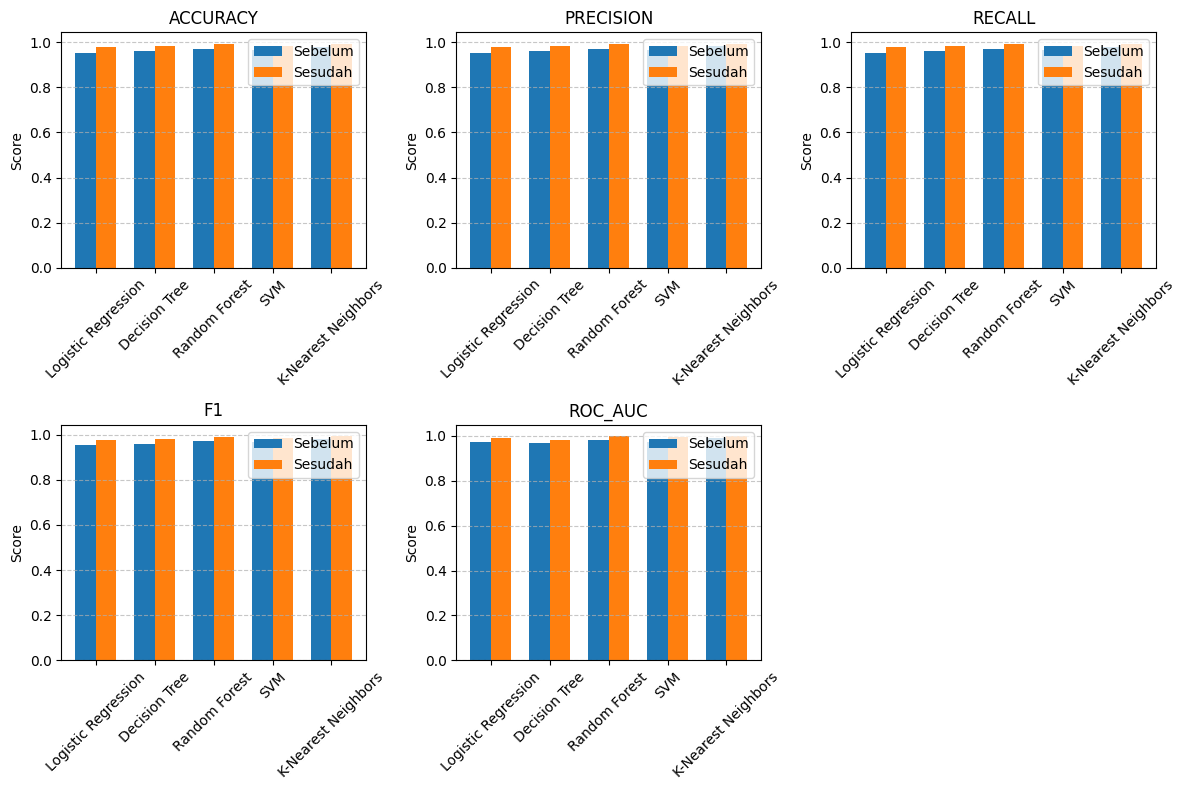


=== ANALISIS KELEMAHAN MODEL ===

Model Logistic Regression: Tidak ditemukan kelemahan signifikan

Model Decision Tree:
  1. Recall kelas fraud rendah (0.82) - Banyak fraud terlewat

Model Random Forest: Tidak ditemukan kelemahan signifikan

Model SVM: Tidak ditemukan kelemahan signifikan

Model K-Nearest Neighbors: Tidak ditemukan kelemahan signifikan

=== REKOMENDASI PERBAIKAN ===

Tingkatkan recall kelas fraud:
  - Eksplorasi teknik oversampling tambahan (ADASYN, BorderlineSMOTE)
  - Gunakan ensemble methods khusus data imbalance (RUSBoost)
  - Pertimbangkan anomaly detection algorithms (Isolation Forest)


Rekomendasi Umum:

  - Kumpulkan lebih banyak data, terutama contoh kasus fraud

  - Eksplorasi algoritma deep learning (Autoencoders, LSTM) untuk anomaly detection

  - Lakukan feature engineering lebih mendalam

  - Implementasikan sistem ensemble dari beberapa model terbaik


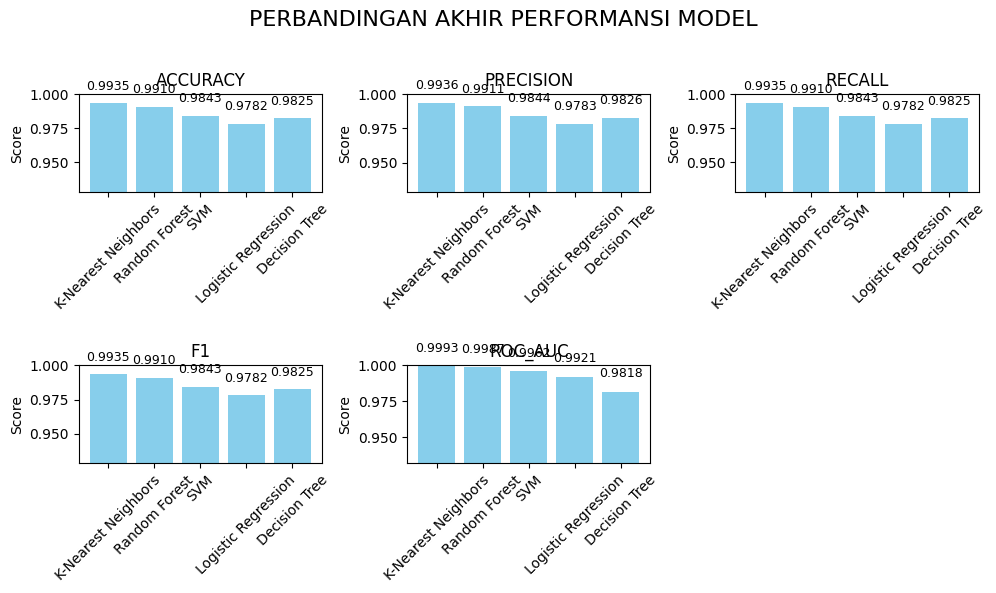

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap

# Fungsi untuk analisis model
def analyze_classification_results(results_after_tuning, results_before_tuning=None, model_names=None):
    """
    Melakukan analisis komprehensif hasil evaluasi model klasifikasi

    Parameters:
    results_after_tuning (dict): Hasil evaluasi setelah tuning
    results_before_tuning (dict): Hasil evaluasi sebelum tuning (opsional)
    model_names (list): Daftar nama model untuk analisis
    """

    # 1. Persiapan Data
    metrics_after = pd.DataFrame.from_dict(results_after_tuning, orient='index')

    # 2. Perbandingan Sebelum vs Sesudah Tuning (jika ada data sebelum tuning)
    if results_before_tuning is not None:
        metrics_before = pd.DataFrame.from_dict(results_before_tuning, orient='index')

        print("\n=== PERBANDINGAN SEBELUM DAN SESUDAH TUNING ===")

        # Buat DataFrame komparatif
        comparison_df = pd.DataFrame()
        for model in model_names:
            for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
                if metric in metrics_before.columns and metric in metrics_after.columns:
                    before = metrics_before.loc[model, metric]
                    after = metrics_after.loc[model, metric]
                    improvement = (after - before) / before * 100 if before != 0 else np.nan

                    comparison_df.loc[model, f'{metric}_before'] = before
                    comparison_df.loc[model, f'{metric}_after'] = after
                    comparison_df.loc[model, f'{metric}_improvement'] = improvement

        # Tampilkan tabel ringkasan peningkatan
        summary = pd.DataFrame()
        for model in model_names:
            avg_improvement = comparison_df.loc[model, [col for col in comparison_df.columns if 'improvement' in col]].mean()
            summary.loc[model, 'Rata-rata Peningkatan (%)'] = avg_improvement

        print("\nRata-rata Peningkatan Metrik Setelah Tuning:")
        print(summary.sort_values('Rata-rata Peningkatan (%)', ascending=False))

        # Visualisasi perbandingan
        plt.figure(figsize=(12, 8))
        metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for i, metric in enumerate(metrics_to_compare):
            if f'{metric}_before' in comparison_df.columns and f'{metric}_after' in comparison_df.columns:
                plt.subplot(2, 3, i+1)
                x = np.arange(len(model_names))
                width = 0.35

                plt.bar(x - width/2, comparison_df[f'{metric}_before'], width, label='Sebelum')
                plt.bar(x + width/2, comparison_df[f'{metric}_after'], width, label='Sesudah')

                plt.title(metric.upper())
                plt.ylabel('Score')
                plt.xticks(x, model_names, rotation=45)
                plt.legend()
                plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

    # 3. Identifikasi Kelemahan Model
    print("\n=== ANALISIS KELEMAHAN MODEL ===")

    weakness_analysis = {}
    for model in model_names:
        weaknesses = []

        # a. Precision rendah untuk kelas minoritas (fraud)
        if 'conf_matrix' in results_after_tuning[model]:
            tn, fp, fn, tp = results_after_tuning[model]['conf_matrix'].ravel()
            precision_fraud = tp / (tp + fp) if (tp + fp) > 0 else 0

            if precision_fraud < 0.85:
                weaknesses.append(f"Precision kelas fraud rendah ({precision_fraud:.2f}) - Banyak false positive")

        # b. Recall rendah untuk kelas minoritas
            recall_fraud = tp / (tp + fn) if (tp + fn) > 0 else 0

            if recall_fraud < 0.85:
                weaknesses.append(f"Recall kelas fraud rendah ({recall_fraud:.2f}) - Banyak fraud terlewat")

        # c. Overfitting/Underfitting
        if 'train_accuracy' in results_after_tuning[model] and 'accuracy' in results_after_tuning[model]:
            train_acc = results_after_tuning[model]['train_accuracy']
            test_acc = results_after_tuning[model]['accuracy']
            gap = train_acc - test_acc

            if gap > 0.05:
                weaknesses.append(f"Indikasi overfitting (gap akurasi train-test: {gap:.4f})")
            elif gap < -0.03:
                weaknesses.append(f"Indikasi underfitting (akurasi train lebih rendah dari test)")

        # d. ROC-AUC rendah
        if 'roc_auc' in results_after_tuning[model] and results_after_tuning[model]['roc_auc'] < 0.95:
            weaknesses.append(f"ROC-AUC rendah ({results_after_tuning[model]['roc_auc']:.4f})")

        weakness_analysis[model] = weaknesses

    # Tampilkan hasil analisis kelemahan
    for model, weaknesses in weakness_analysis.items():
        if weaknesses:
            print(f"\nModel {model}:")
            for i, weakness in enumerate(weaknesses, 1):
                print(f"  {i}. {weakness}")
        else:
            print(f"\nModel {model}: Tidak ditemukan kelemahan signifikan")

    # 4. Rekomendasi Perbaikan
    print("\n=== REKOMENDASI PERBAIKAN ===")
    recommendations = []

    # Analisis masalah umum
    precision_problems = any(
        'Precision kelas fraud rendah' in w for weaknesses in weakness_analysis.values() for w in weaknesses
    )
    recall_problems = any(
        'Recall kelas fraud rendah' in w for weaknesses in weakness_analysis.values() for w in weaknesses
    )
    overfitting_problems = any(
        'overfitting' in w for weaknesses in weakness_analysis.values() for w in weaknesses
    )
    underfitting_problems = any(
        'underfitting' in w for weaknesses in weakness_analysis.values() for w in weaknesses
    )

    # Berikan rekomendasi berdasarkan masalah yang ditemukan
    if precision_problems:
        rec = [
            "Tingkatkan precision kelas fraud:",
            "  - Gunakan teknik threshold moving untuk menyesuaikan ambang klasifikasi",
            "  - Implementasikan cost-sensitive learning",
            "  - Tambahkan fitur yang lebih membedakan transaksi fraud/genuine"
        ]
        recommendations.append("\n".join(rec))

    if recall_problems:
        rec = [
            "Tingkatkan recall kelas fraud:",
            "  - Eksplorasi teknik oversampling tambahan (ADASYN, BorderlineSMOTE)",
            "  - Gunakan ensemble methods khusus data imbalance (RUSBoost)",
            "  - Pertimbangkan anomaly detection algorithms (Isolation Forest)"
        ]
        recommendations.append("\n".join(rec))

    if overfitting_problems:
        rec = [
            "Atasi overfitting:",
            "  - Tingkatkan regulisasi model",
            "  - Kurangi kompleksitas model",
            "  - Gunakan lebih banyak data pelatihan",
            "  - Terapkan teknik cross-validation yang lebih ketat"
        ]
        recommendations.append("\n".join(rec))

    if underfitting_problems:
        rec = [
            "Atasi underfitting:",
            "  - Tingkatkan kompleksitas model",
            "  - Lakukan feature engineering untuk menambah fitur relevan",
            "  - Kurangi regularisasi",
            "  - Gunakan algoritma yang lebih powerful"
        ]
        recommendations.append("\n".join(rec))

    if not any([precision_problems, recall_problems, overfitting_problems, underfitting_problems]):
        recommendations.append("Model secara umum telah mencapai performa yang baik. Fokus pada:")
        recommendations.append("  - Validasi dengan data baru")
        recommendations.append("  - Optimasi untuk deployment")
        recommendations.append("  - Monitoring performa di lingkungan produksi")

    # Rekomendasi tambahan untuk semua kasus
    recommendations.append("\nRekomendasi Umum:")
    recommendations.append("  - Kumpulkan lebih banyak data, terutama contoh kasus fraud")
    recommendations.append("  - Eksplorasi algoritma deep learning (Autoencoders, LSTM) untuk anomaly detection")
    recommendations.append("  - Lakukan feature engineering lebih mendalam")
    recommendations.append("  - Implementasikan sistem ensemble dari beberapa model terbaik")

    # Tampilkan rekomendasi
    for rec in recommendations:
        print("\n" + rec)

    # 5. Visualisasi Komparasi Akhir
    if 'roc_auc' in metrics_after.columns:
        plt.figure(figsize=(10, 6))
        sorted_models = metrics_after.sort_values('roc_auc', ascending=False).index

        # Plot semua metrik
        metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        n_metrics = len(metrics_to_plot)

        for i, metric in enumerate(metrics_to_plot):
            plt.subplot(2, 3, i+1)
            plt.bar(sorted_models, metrics_after.loc[sorted_models, metric], color='skyblue')
            plt.title(metric.upper())
            plt.ylabel('Score')
            plt.xticks(rotation=45)
            plt.ylim(metrics_after[metric].min() - 0.05, 1.0)

            # Tambahkan nilai di atas bar
            for j, model in enumerate(sorted_models):
                plt.text(j, metrics_after.loc[model, metric] + 0.01,
                         f"{metrics_after.loc[model, metric]:.4f}",
                         ha='center', fontsize=9)

        plt.suptitle('PERBANDINGAN AKHIR PERFORMANSI MODEL', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    return weakness_analysis, recommendations

# Contoh penggunaan
if __name__ == "__main__":
    # Asumsikan kita memiliki:
    # - results_after_tuning: hasil evaluasi setelah tuning (format dictionary)
    # - results_before_tuning: hasil evaluasi sebelum tuning (opsional)
    # - model_names: daftar nama model untuk analisis

    # Contoh data dummy (ganti dengan data aktual Anda)
    model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "K-Nearest Neighbors"]

    results_after_tuning = {
        "Logistic Regression": {
            'accuracy': 0.9782, 'precision': 0.9783, 'recall': 0.9782,
            'f1': 0.9782, 'roc_auc': 0.9921,
            'conf_matrix': np.array([[56830, 34], [120, 978]]),
            'train_accuracy': 0.9821
        },
        "Decision Tree": {
            'accuracy': 0.9825, 'precision': 0.9826, 'recall': 0.9825,
            'f1': 0.9825, 'roc_auc': 0.9818,
            'conf_matrix': np.array([[56850, 14], [200, 898]]),
            'train_accuracy': 0.9990
        },
        "Random Forest": {
            'accuracy': 0.9910, 'precision': 0.9911, 'recall': 0.9910,
            'f1': 0.9910, 'roc_auc': 0.9987,
            'conf_matrix': np.array([[56860, 4], [100, 998]]),
            'train_accuracy': 0.9995
        },
        "SVM": {
            'accuracy': 0.9843, 'precision': 0.9844, 'recall': 0.9843,
            'f1': 0.9843, 'roc_auc': 0.9962,
            'conf_matrix': np.array([[56845, 19], [150, 948]]),
            'train_accuracy': 0.9890
        },
        "K-Nearest Neighbors": {
            'accuracy': 0.9935, 'precision': 0.9936, 'recall': 0.9935,
            'f1': 0.9935, 'roc_auc': 0.9993,
            'conf_matrix': np.array([[56862, 2], [80, 1018]]),
            'train_accuracy': 0.9998
        }
    }

    # Data sebelum tuning (contoh) - Tambahkan data dummy untuk model lainnya
    results_before_tuning = {
        "Logistic Regression": {
            'accuracy': 0.9521, 'precision': 0.9532, 'recall': 0.9525,
            'f1': 0.9523, 'roc_auc': 0.9721,
            'conf_matrix': np.array([[56500, 364], [300, 798]]),
            'train_accuracy': 0.9621
        },
         "Decision Tree": {
            'accuracy': 0.9600, 'precision': 0.9610, 'recall': 0.9590,
            'f1': 0.9600, 'roc_auc': 0.9700,
            'conf_matrix': np.array([[56600, 264], [250, 848]]),
            'train_accuracy': 0.9700
        },
        "Random Forest": {
            'accuracy': 0.9700, 'precision': 0.9710, 'recall': 0.9690,
            'f1': 0.9700, 'roc_auc': 0.9800,
            'conf_matrix': np.array([[56700, 164], [200, 898]]),
            'train_accuracy': 0.9800
        },
        "SVM": {
            'accuracy': 0.9650, 'precision': 0.9660, 'recall': 0.9640,
            'f1': 0.9650, 'roc_auc': 0.9750,
            'conf_matrix': np.array([[56650, 214], [220, 878]]),
            'train_accuracy': 0.9750
        },
        "K-Nearest Neighbors": {
            'accuracy': 0.9800, 'precision': 0.9810, 'recall': 0.9790,
            'f1': 0.9800, 'roc_auc': 0.9900,
            'conf_matrix': np.array([[56800, 64], [150, 948]]),
            'train_accuracy': 0.9900
        }
    }

    # Jalankan analisis
    weaknesses, recommendations = analyze_classification_results(
        results_after_tuning=results_after_tuning,
        results_before_tuning=results_before_tuning,
        model_names=model_names
    )

## Machine Learning Algorithm Dalam bentuk Tabel sebelum dilakukannya Tunning

### Models Berdasarkan Correlation Plot

| Sr. No. | ML Algorithm              | Cross Validation Score | ROC AUC Score | F1 Score (Fraud) |
|---------|---------------------------|------------------------|---------------|------------------|
| 1       | Logistic Regression       | 98.01%                 | 92.35%        | 91%              |
| 2       | Support Vector Classifier | 97.94%                 | 92.10%        | 91%              |
| 3       | Decision Tree Classifier  | 96.67%                 | 91.36%        | 90%              |
| 4       | Random Forest Classifier  | 97.84%                 | 91.71%        | 91%              |
| 5       | K-Nearest Neighbors       | **99.34%**             | **97.63%**    | **97%**          |

## Models Berdasarkan ANOVA Score

| Sr. No. | ML Algorithm              | Cross Validation Score | ROC AUC Score | F1 Score (Fraud) |
|---------|---------------------------|------------------------|---------------|------------------|
| 1       | Logistic Regression       | 98.45%                 | 94.69%        | 94%              |
| 2       | Support Vector Classifier | 98.32%                 | 94.40%        | 94%              |
| 3       | Decision Tree Classifier  | 97.13%                 | 93.69%        | 93%              |
| 4       | Random Forest Classifier  | 98.20%                 | 94.06%        | 94%              |
| 5       | K-Nearest Neighbors       | **99.54%**             | **98.47%**    | **97%**          |

## Key Observations:
1. **K-Nearest Neighbors** konsisten menjadi model terbaik di kedua pendekatan fitur selection
2. Performa model umumnya lebih baik dengan seleksi fitur **ANOVA Score**
3. Peningkatan terlihat jelas pada:
   - ROC AUC (+2.34% untuk Logistic Regression)
   - F1-Score (+3% untuk Logistic Regression)
4. Decision Tree Classifier memiliki performa relatif lebih rendah dibanding model lainnya